In [1]:
%pylab inline

import numpy as np
from sklearn import datasets

Populating the interactive namespace from numpy and matplotlib


In [2]:
def k_means(k, data):
    
    def init_centres():
        return data[np.random.choice(data.shape[0], k, replace=False), :]
    
    def nearest_centres(r):
        dists = ((data[:, np.newaxis, :] - r)**2).sum(axis=2)
        return np.argmin(dists, axis=1)
    
    def compute_centres(nearest_centres):
        return np.array([np.mean(data[nearest_centres == i, :], axis=0) for i in np.unique(nearest_centres)])
    
    r = init_centres()
    prev_nearest_centres = None
    curr_nearest_centres = nearest_centres(r)
    while prev_nearest_centres is None or (prev_nearest_centres != curr_nearest_centres).any():
        r = compute_centres(curr_nearest_centres)
        prev_nearest_centres = curr_nearest_centres
        curr_nearest_centres = nearest_centres(r)
    return r, curr_nearest_centres

Mislabeled: 16 (10.67%)


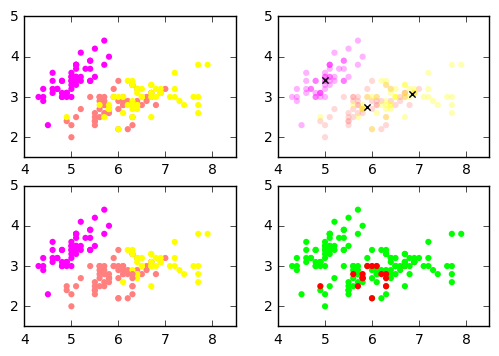

In [3]:
iris = datasets.load_iris()
iris_x, iris_y= iris.data[:, 0], iris.data[:, 1]
centres, nearest_centres = k_means(3, iris.data)

def renumber_groups(groups):
    group_map = [np.argmax([sum(iris.target[groups == j] == i) for i in range(3)]) for j in range(3)]
    for i in range(3):
        groups[groups == i] = group_map[i] + 3
    return groups - 3

renumbered_nearest_centres = renumber_groups(nearest_centres)
hits = iris.target == renumbered_nearest_centres

subplot(2,2,1)
scatter(iris_x, iris_y, c=iris.target, cmap="spring", edgecolors="none")
xticks(range(4,9))
yticks(range(2,6))

subplot(2,2,2)
scatter(iris_x, iris_y, c=iris.target, cmap="spring", edgecolors="none", alpha=0.3)
scatter(centres[:, 0], centres[:, 1], c="black", marker="x")
xticks(range(4,9))
yticks(range(2,6))

subplot(2,2,3)
scatter(iris_x, iris_y, c=renumbered_nearest_centres, cmap="spring", edgecolors="none")
xticks(range(4,9))
yticks(range(2,6))

subplot(2,2,4)
scatter(iris_x, iris_y, c=["lime" if hit else "r" for hit in hits], edgecolors="none")
xticks(range(4,9))
yticks(range(2,6))

print "Mislabeled: {} ({:.2f}%)".format(sum(~hits), 100.0*sum(~hits)/len(hits))